# 자연어 처리 시작하기


## 한글 자연어 처리 기초 - KoNLpy 모듈 사용

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [6]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [7]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [9]:
from konlpy.tag import Twitter
t = Twitter()

/anaconda3/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 워드 클라우드

In [13]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [14]:
text = open('../data/08.alice.txt').read()
alice_mask = np.array(Image.open('../data/08.alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add('said')

In [15]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    
    rc('font', family=font_name)
    
else:
    print('Unknown system... sorry~~~~') 

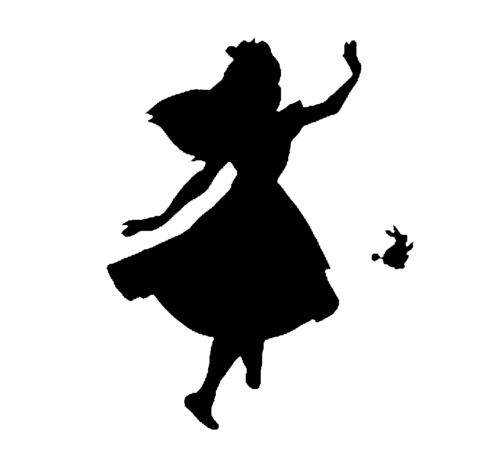

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
wc = WordCloud(background_color='white', max_words=2000, 
               mask=alice_mask, stopwords=stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

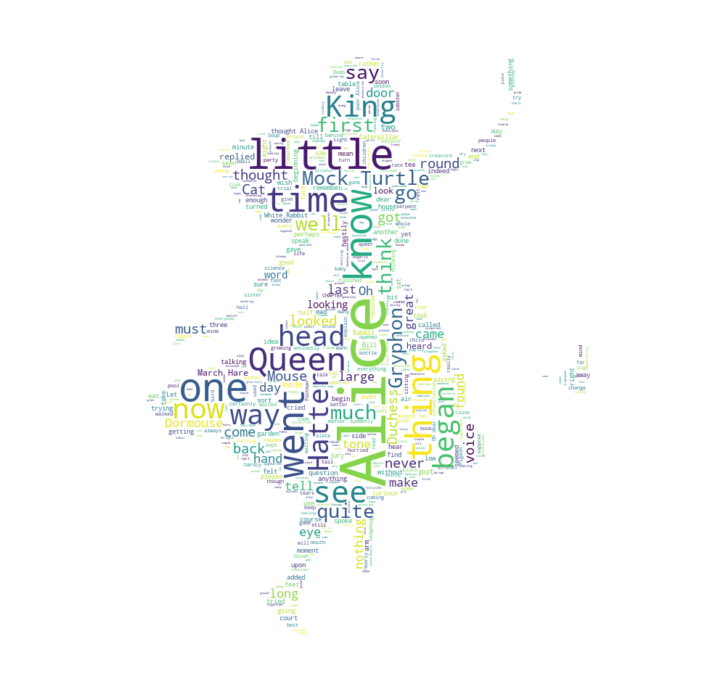

In [18]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
text = open('../data/08.a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE's", 'Luke')

mask = np.array(Image.open('../data/08.stormtrooper_mask.png'))

In [20]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [21]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
              margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [22]:
import random

def grey_color_func(word, font_size, position, orientation,
                   random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

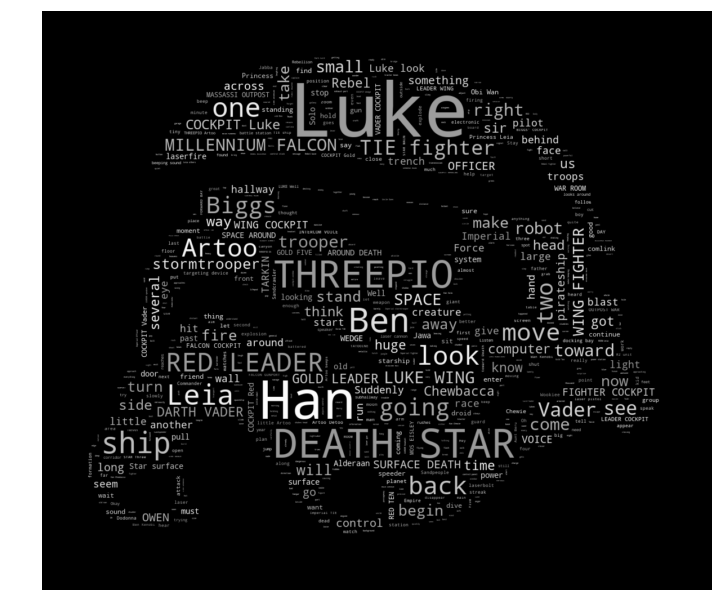

In [23]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 육아휴직관련 법안 대한민국 국회 제 1809890호 의안

In [24]:
import nltk

In [25]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [26]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [27]:
from konlpy.tag import Twitter
t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

/anaconda3/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [28]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의완 제 1809890호')

In [29]:
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

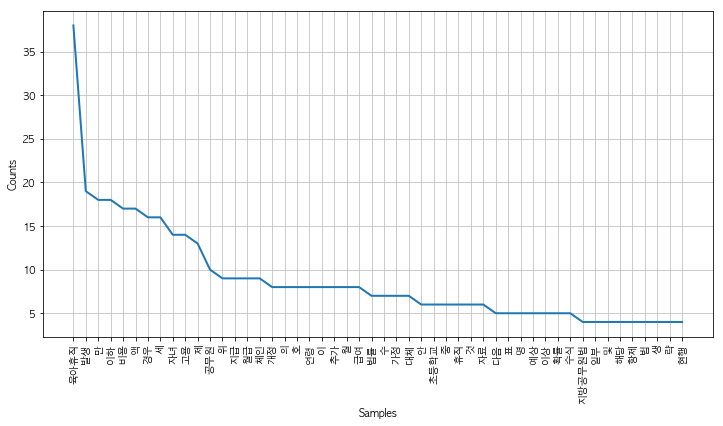

In [30]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [31]:
stop_words = [
    '.', '(', ')', ',', "'", '%', 
    '-', 'X', ').', '×', '의', '자',
    '에', '안', '번', '호', '을', '이',
    '다', '만', '로', '가', '를'
]

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

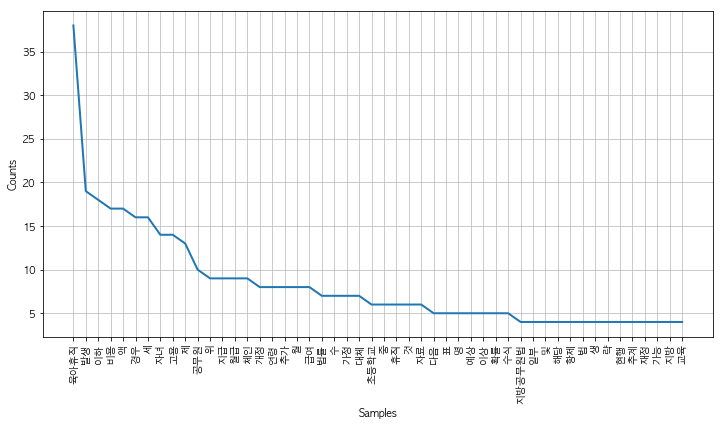

In [32]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [33]:
ko.count('초등학교')

6

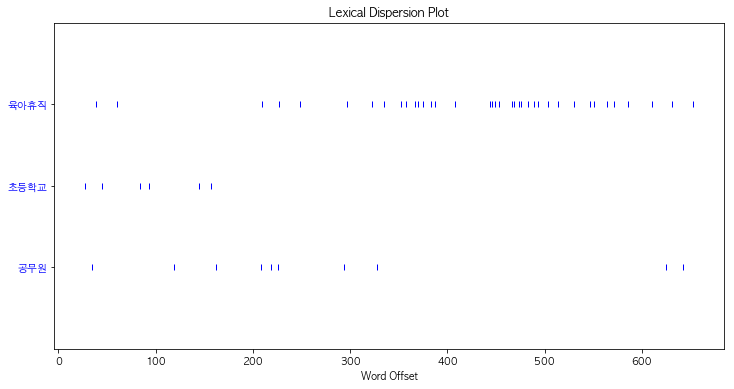

In [34]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [35]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [36]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


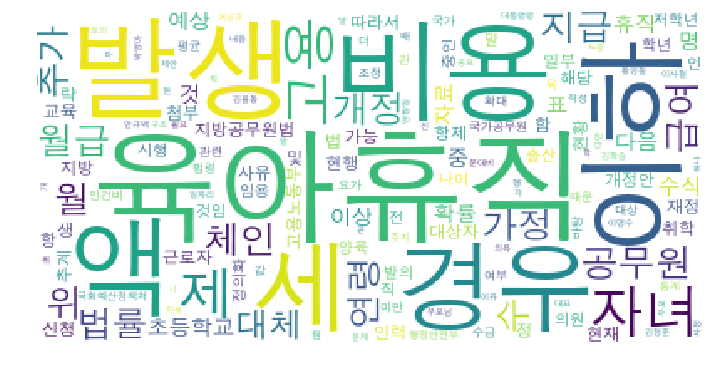

In [37]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                     relative_scaling=0.2,
                     background_color='white',
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Naive Bayes Classifier의 이해 : 영문

In [38]:
from nltk.tokenize import word_tokenize
import nltk

In [39]:
train =[
    ('i like you', 'pos'),
    ('i hate you', 'neg'),
    ('you like me', 'neg'),
    ('i like her', 'pos')
]

In [40]:
all_words = set(word.lower() for sentence in train
                               for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [41]:
t = [({word:(word in word_tokenize(x[0])) for word in all_words}, x[1])
                                            for x in train]
t

[({'like': True,
   'me': False,
   'you': True,
   'i': True,
   'her': False,
   'hate': False},
  'pos'),
 ({'like': False,
   'me': False,
   'you': True,
   'i': True,
   'her': False,
   'hate': True},
  'neg'),
 ({'like': True,
   'me': True,
   'you': True,
   'i': False,
   'her': False,
   'hate': False},
  'neg'),
 ({'like': True,
   'me': False,
   'you': False,
   'i': True,
   'her': True,
   'hate': False},
  'pos')]

In [42]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    like = True              pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0


In [43]:
test_sentence = 'i like MeRui'
test_sentence_features = {
            word.lower():
                (word in word_tokenize(test_sentence.lower()))
                    for word in all_words}
test_sentence_features

{'like': True,
 'me': False,
 'you': False,
 'i': True,
 'her': False,
 'hate': False}

In [44]:
classifier.classify(test_sentence_features)

'pos'

## Naive Bayes Classifier의 이해 : 한글

In [45]:
from konlpy.tag import Twitter

In [46]:
pos_tagger = Twitter()

/anaconda3/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [47]:
train = [
    ('메리가 좋아', 'pos'), 
    ('고양이도 좋아', 'pos'),
    ('난 수업이 지루해', 'neg'),
    ('메리는 이쁜 고양이야', 'pos'),
    ('난 마치고 메리랑 놀거야', 'pos')
]

In [48]:
all_words = set(word.lower() for sentence in train 
                                for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [49]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                for x in train]
t

[({'지루해': False,
   '놀거야': False,
   '좋아': True,
   '메리는': False,
   '수업이': False,
   '난': False,
   '고양이야': False,
   '이쁜': False,
   '마치고': False,
   '고양이도': False,
   '메리가': True,
   '메리랑': False},
  'pos'),
 ({'지루해': False,
   '놀거야': False,
   '좋아': True,
   '메리는': False,
   '수업이': False,
   '난': False,
   '고양이야': False,
   '이쁜': False,
   '마치고': False,
   '고양이도': True,
   '메리가': False,
   '메리랑': False},
  'pos'),
 ({'지루해': True,
   '놀거야': False,
   '좋아': False,
   '메리는': False,
   '수업이': True,
   '난': True,
   '고양이야': False,
   '이쁜': False,
   '마치고': False,
   '고양이도': False,
   '메리가': False,
   '메리랑': False},
  'neg'),
 ({'지루해': False,
   '놀거야': False,
   '좋아': False,
   '메리는': True,
   '수업이': False,
   '난': False,
   '고양이야': True,
   '이쁜': True,
   '마치고': False,
   '고양이도': False,
   '메리가': False,
   '메리랑': False},
  'pos'),
 ({'지루해': False,
   '놀거야': True,
   '좋아': False,
   '메리는': False,
   '수업이': False,
   '난': True,
   '고양이야': False,
   '이쁜': False,
   '마치고': True,
   '고양이도': 

In [50]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0


In [51]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [52]:
test_sent_features = {
        word.lower():
            (word in word_tokenize(test_sentence.lower()))
                for word in all_words}

test_sent_features

{'지루해': False,
 '놀거야': True,
 '좋아': False,
 '메리는': False,
 '수업이': True,
 '난': True,
 '고양이야': False,
 '이쁜': False,
 '마치고': False,
 '고양이도': False,
 '메리가': False,
 '메리랑': True}

In [53]:
classifier.classify(test_sent_features)

'neg'

In [54]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [55]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [56]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [57]:
def term_exists(doc):
    return {word:(word in set(doc)) for word in tokens}

In [58]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [59]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [60]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [61]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [62]:
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
                  야/Josa = False             neg : pos    =      1.1 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
           이쁘다/Adjective = False             neg : pos    =      1.1 : 1.0
                 마치/Noun = False             neg : pos    =      1.1 : 1.0


In [63]:
test_sent_features = {word:(word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [64]:
test_sent_features = {word: ('/'.join(word) in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): True,
 ('수업', 'Noun'): True,
 ('이', 'Josa'): True,
 ('마치', 'Noun'): True,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): True,
 ('랑', 'Josa'): True,
 ('놀거야', 'Verb'): False}

In [65]:
classifier.classify(test_sent_features)

'pos'

## 문장의 유사도 측정

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
vectorizer = CountVectorizer(min_df=1)

In [68]:
contents =[
    '메리랑 놀러가고 싶지만 바쁜데 어떡하죠?',
    '메리는 공원에서 산책하고 노는 것을 싫어해요',
    '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
    '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요'
]

In [69]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '여행을',
 '이상해요',
 '있어요']

In [70]:
from konlpy.tag import Twitter
t = Twitter()

/anaconda3/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [71]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떡하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [72]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떡하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [73]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [74]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [75]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [76]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    
    for word in content :
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [77]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [78]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [79]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [80]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s"%(i, d, contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [81]:
print("Best post is %i, dist = %.2f"%(best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [82]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [83]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [84]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s"%(i, d, contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [85]:
print("Best post is %i, dist = %.2f"%(best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [86]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf, idf

In [87]:
a, abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a, abb, abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.40546510810816438)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.40546510810816438)
(0.3333333333333333, 1.0986122886681098)


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [89]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [90]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [91]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [92]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [93]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s"%(i, d, contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f"%(best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=0.90   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=1.18   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.16   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?


## 여자친구 선물 고르기
- 예제 코드 작동 X

In [94]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time